<a href="https://colab.research.google.com/github/GuptaRitik/Ted-talk-views-prediction/blob/main/TEDx_talks_views_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

#### This is the Regression problem as we need to predict Views (continous values), and there are various algorithm available which we are trying to model and choose the optimal model.  


## Overview of Data Attributes 

Attribute - Description

* talk_id - Talk identification number provided by TED


* title - Title of the talk string

* speaker_1 - First speaker in TED's speaker list

* speakers - Speakers in the talk 

* occupations - *Occupations of the speakers


* about_speakers - *Blurb about each
speaker


* recorded_date - Date the talk was
recorded



* published_date - Date the talk was
published to TED.com


* event - Event or medium in
which the talk was given



* native_lang - Language the talk was
given in



* available_lang - All available languages
(lang_code) for a talk


* comments - Count of comments 

* duration - Duration in seconds 

* topics - Related tags or topics
for the talk


* related_talks - Related talks
(key='talk_id',
value='title')


* url - URL of the talk 

* description - Description of the talk 

* transcript - Full transcript of the talk 


* **views -  Count of views (Target Variable)**

# Goal:- 

### Analysing the data, providing insights and build a predictive ML model to predict the views for any given data of videos. 

## Process towards Goal:-

* Importing necessary libraries (for Model building we're gonna  use scikit-learn)
* Importing dataset
* Data processing for EDA
* Exploratory data analysis
* Deriving insights and short conclusions
* Data Cleaning/Null value/missing value treatment 
* Feature engineering
* Data preprocessing
* Model building
* Hyperparameter tuning
* Comparision and selection of model
* conclusion

## Importing Libraries

In [ ]:
# Data and EDA libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

In [ ]:
from matplotlib import style

## Data Importing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML-Regression/data_ted_talks.csv')

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df.shape

(4005, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

### Overview before EDA

In [ ]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Some of the features has null values, we can try checking each column for more details along with EDA

In [ ]:
#Checking the feature and its null vlaues
df[['speaker_1', 'all_speakers']]

,speaker_1,all_speakers
0,Al Gore,{0: 'Al Gore'}
1,Hans Rosling,{0: 'Hans Rosling'}
2,David Pogue,{0: 'David Pogue'}
3,Majora Carter,{0: 'Majora Carter'}
4,Sir Ken Robinson,{0: 'Sir Ken Robinson'}
...,...,...
4000,Nancy Lublin,{0: 'Nancy Lublin'}
4001,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'}
4002,Dick M. Carpenter II,{0: 'Dick M. Carpenter II'}
4003,Daina Ramey Berry,{0: 'Daina Ramey Berry'}


We found that **speaker_1** and **all_speaker** has same names, so its better if we can drop that since it not impacting our EDA and model.

In [ ]:
# Dropping the all speaker column.

df.drop('all_speakers', axis=1, inplace=True)

In [ ]:
df.head(6)

Occupation has values as the key value pair, to perform better in EDA we have to convert this in the simple form.

In [ ]:
df['occupations'] = df['occupations'].apply(lambda x: eval(x) if type(x) == str else 0) # using eval to remove the external string to operate in dictionary inside it
df['occupations'] = df['occupations'].apply(lambda x: x[0][0] if type(x) == dict else np.nan) # using the key, getting the names inside the dictionary, else setting as NaN


In [ ]:
df['occupations'].head(3)

0                        climate advocate
1    global health expert; data visionary
2                    technology columnist
Name: occupations, dtype: object

**about_speakers** has descriptive string values, and its not make sense in EDA or model, leaving as it is for now.


**Recorded_date** we can leave as it is, and will do operation for this on data cleaning part

**comments** column has some null but we can leave it here to do our EDA on it ans see what can be done to fill the values

# Exploratory Data Analysis

In [ ]:
df.head()

#### Statistical overview of the numerical features in data

In [ ]:
pd.set_option('float_format', '{:f}'.format)
df.describe()

,views,comments,duration
count,4005.000000,3350.000000,4005.000000
mean,2148005.573783,161.997015,724.011236
std,3451225.523659,268.838922,361.775462
min,0.000000,0.000000,60.000000
25%,882069.000000,38.000000,393.000000
50%,1375508.000000,89.000000,738.000000
75%,2133110.000000,188.000000,974.000000
max,65051954.000000,6449.000000,3922.000000


There are certainly 2 numerical features given in data, **views** is the Dependent variable, and the **talk id** is unique identifier of the video, so for furthr analysis we can leverage this column by makiing it as  the index to simplify the analysis using ".loc" method

In [ ]:
# setting the id as index using set index method
df.set_index('talk_id',inplace=True)

### Analysing the Speaker, its occurances and impact on views, comments etc. 

In [ ]:
# storing the counts of speaker in a dataframe
speaker_counts = pd.DataFrame(df.speaker_1.value_counts().sort_values())

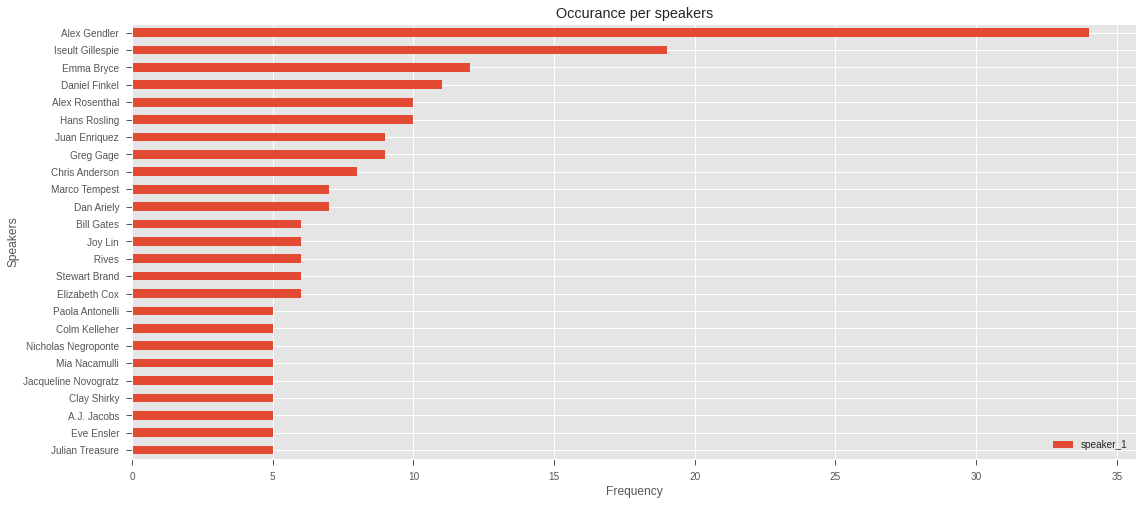

In [ ]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot') # setting the style

# plotting the frequesncies of  top 25 repetative speakers

speaker_counts.tail(25).plot(kind='barh') 
plt.xlabel('Frequency')
plt.ylabel('Speakers')
plt.title('Occurance per speakers')
plt.show()

Alex Gendler and Iseult Gillespie have the most number of occurance in TEDx events as speaker

In [ ]:
df.head()

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,climate advocate,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,global health expert; data visionary,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,technology columnist,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
53,Greening the ghetto,Majora Carter,activist for environmental justice,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
66,Do schools kill creativity?,Sir Ken Robinson,author,"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


Analysing top 10 Speakers with highest average views

In [ ]:
df.groupby('speaker_1')['views'].mean().sort_values(ascending=False).head(10).

speaker_1
Amy Cuddy           57074270.000000
James Veitch        39421820.500000
Tim Urban           37976820.000000
Cameron Russell     33874546.000000
Sam Berns           33691484.000000
Robert Waldinger    32396714.000000
Simon Sinek         31330591.500000
Mary Roach          30977634.000000
Brené Brown         30642988.500000
Graham Shaw         29953076.000000
Pamela Meyer        28748868.000000
Sir Ken Robinson    28126839.333333
Apollo Robbins      27208963.000000
Jill Bolte Taylor   26553231.000000
Susan Cain          26039073.000000
Name: views, dtype: float64